사료 제조사별 성능차이가 있을까?(가설검정)

병아리가 부화한 지 5일이 지났다. 그런데 부화장 A에서 태어난 병아리 대비 부화장 B에서 태어난 병아리의 덩치가 더 작아 보인다. 
서로 다른 사료를 먹고 있으나, 정말 작은 건지 검정해보자.

In [6]:
import pandas as pd

test = pd.read_csv('ch4-3.csv')
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


상자 그림으로 분포 비교하기

C:\Users\HKIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HKIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HKIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HKIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-p

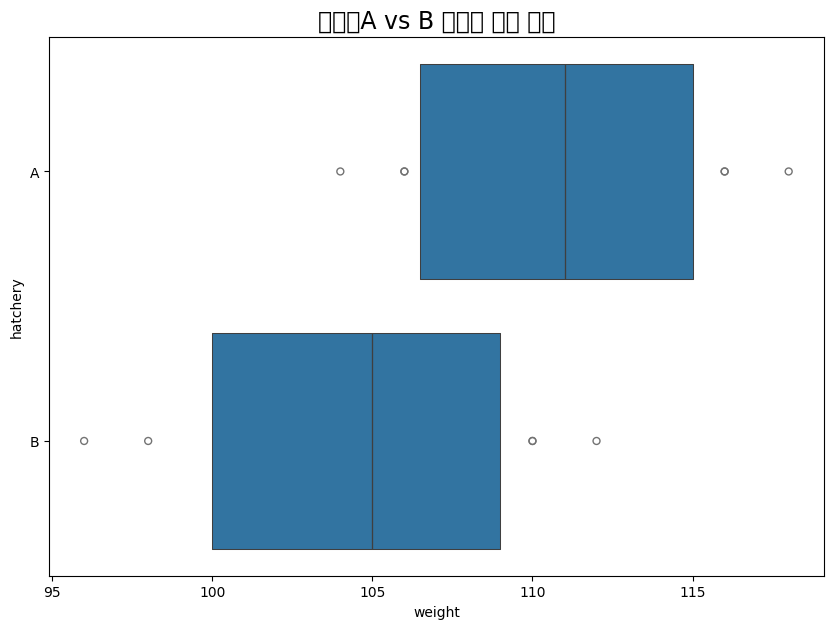

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 읽기
test = pd.read_csv('ch4-3.csv')

plt.figure(figsize=(10,7))
sns.boxenplot(x='weight', y='hatchery', data=test)
plt.title('부화장A vs B 몸무게 분포 비교', fontsize=17)
plt.show()


통계적으로 두 집단간의 몸무게가 같은지 다른지는 어떻게 설명할수 있을까

-> 가설 검정 : 추론 통계의 영역으로 비교하는 값과 차이가 없다는 가정의 귀무가설 반대인 대립가설을 설정해서 검정 통계량으로 가설의 진위를 판단

정규 분포인지 검정하기

가설 검정 방법론이 t-test 통해서 진행

t- test : 데이터가 정규 분포를 한다는 가정하에 평균이 데이터의 대표값의 역할을 한다고 전제

-> 샤피로 - 윌크 검정을 통해서 정규분포를 따르는지 판정
- 샤피로 쓰면 정규분포 있다는거고 t-test써서 귀무가설 대립가설

In [14]:
import scipy as sp

# 부화장 A만 별도로 데이터셋 구성
test_a = test.loc[test.hatchery == 'A', 'weight']
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400016973451231, pvalue=0.5530322552073004)

In [13]:
# 부화장 B만 별도로 데이터셋 구성
test_b = test.loc[test.hatchery == 'B', 'weight']
sp.stats.shapiro(test_b)

ShapiroResult(statistic=0.9390683777600799, pvalue=0.5426943326835627)

pvalue라는 값이 test_a가 0.553   b는 0.542
신뢰수준을 95%로 설정할 때 수준인 0.05보다 큼
-> 귀무가설을 채택 -> 정규분포이다

샤피로 월크 검정을 통과 -> 정규분포

t-test로 두 집단 간 평균 검정하기

샤피로했을때 95퍼는 0.05라는것 아래에 0.010~이니 우리가 생각한 기준에 안맞는듯

In [15]:
# 부화장 A,B 집단 간 평균 검정
sp.stats.ttest_ind(test_a,test_b)

TtestResult(statistic=2.842528280230058, pvalue=0.010803990633924204, df=18.0)

두 부화장 A,B 병아리 크기 확인해보니 실제 pvalue 0.01인것을 확인 < 0.05 보다 작다(95% 신뢰수준) 몸무게가 서로 다르다!

<img src="1.png" width="600" height="600">

<img src="2.png" width="600" height="600">

<img src="3.png" width="600" height="600">

1. iris 데이터 셋의 구조와 변수의 자료형을 pandas 메소드를 이용해 확인해 보세요. 몇개의 열과 행으로 이루어졌으며 각 열은 어떤 형태를 갖추고있나요?

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
# sklearn을 사용하여 iris 데이터셋 로드
iris = load_iris()
# pandas 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 행,열 구조 확인
iris_df.info()

# 데이터셋의 구조 확인
print(iris_df.shape)
print(iris_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
(150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object


2. head() 메소드를 이용해 iris 데이터셋의 처음부터 10행까지 데이터 불러오세요

In [20]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


3. sepal_width(꽃받침 너비) 열의 데이터 평균과 표준편차 그리고 3사 분위수를 구해보세요

In [25]:
iris_df['sepal width (cm)'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [23]:
# sepal_width 열의 평균, 표준편차, 3사 분위수 구하기
sepal_width_mean = iris_df['sepal width (cm)'].mean()
sepal_width_std = iris_df['sepal width (cm)'].std()
sepal_width_q3 = iris_df['sepal width (cm)'].quantile(0.75)

print(f"sepal_width 열의 평균: {sepal_width_mean}")
print(f"sepal_width 열의 표준편차: {sepal_width_std}")
print(f"sepal_width 열의 3사 분위수: {sepal_width_q3}")

sepal_width 열의 평균: 3.0573333333333337
sepal_width 열의 표준편차: 0.4358662849366982
sepal_width 열의 3사 분위수: 3.3


4. sepal width 열의 데이터 분포를 히스토그램으로 나타내어 보세요

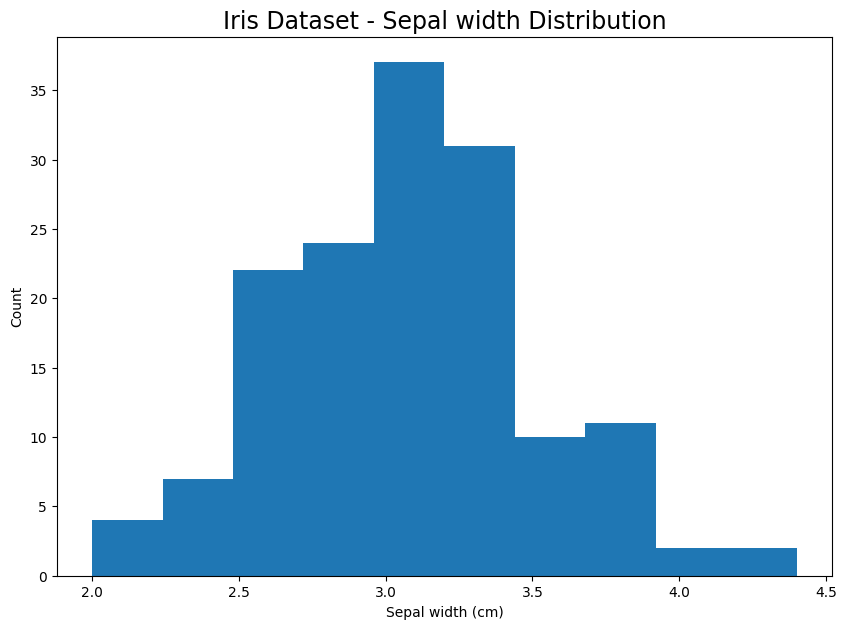

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# sklearn을 사용하여 iris 데이터셋 로드
iris = load_iris()

# pandas 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 히스토그램 그리기
plt.figure(figsize=(10,7))
plt.hist(iris_df['sepal width (cm)'], bins=10)
plt.title('Iris Dataset - Sepal width Distribution', fontsize=17)
plt.xlabel('Sepal width (cm)')
plt.ylabel('Count')
plt.show()


상자그림을 이용해 sepal width의 분포를 나타내어 보세요. 그리고 sepal width가 가장 넓은 품종은 어떤 종인가요?

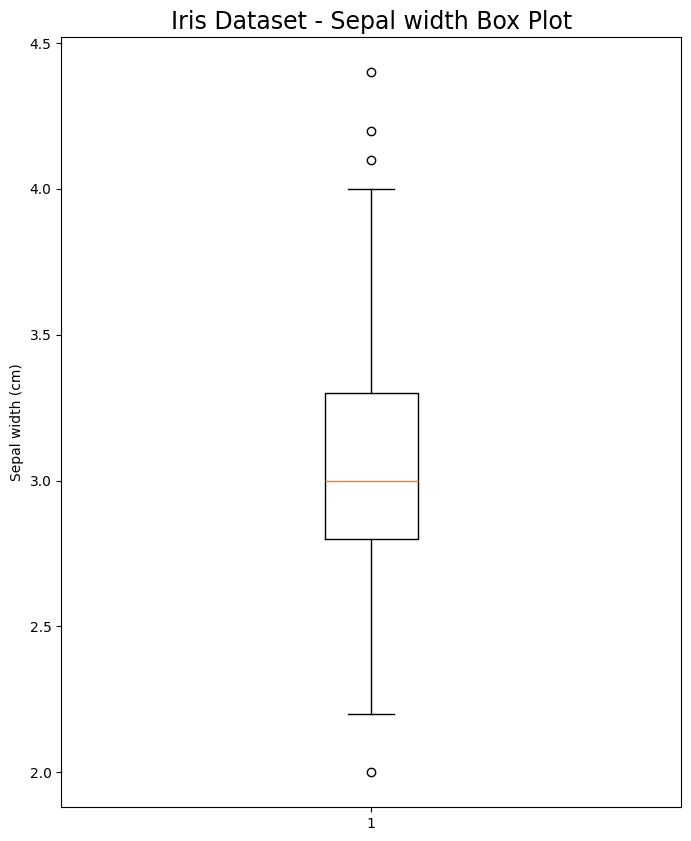

In [37]:
# 상자 그림 그리기
plt.figure(figsize=(8,10))
plt.boxplot(iris_df['sepal width (cm)'])
plt.title('Iris Dataset - Sepal width Box Plot', fontsize=17)
plt.ylabel('Sepal width (cm)')
plt.show()

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# sklearn을 사용하여 iris 데이터셋 로드
iris = load_iris()

# pandas 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# sepal width가 가장 넓은 품종 찾기
max_sepal_width_species = iris.target_names[np.argmax(sepal_width_mean)]

# 결과 출력
print(f"Iris 데이터셋에서 sepal width가 가장 넓은 품종은 {max_sepal_width_species}입니다.")


Iris 데이터셋에서 sepal width가 가장 넓은 품종은 setosa입니다.


6. setosa 품종의 sepal width 만 필터링해 s라는 데이터 셋을 만들고, versicolor 품종의 sepal width만 필터링해 v라는 데이터셋을 만들어보세요

In [46]:
# loc 속성을 사용하면 데이터 필터링 가능

# setosa 품종의 sepal width만 필터링 setosa 0임 versicolor는 1이고
s = iris_df.loc[iris_df['target'] == 0, 'sepal width (cm)']

# versicolor 품종의 sepal width만 필터링  
v = iris_df.loc[iris_df['target'] == 1, 'sepal width (cm)']

In [51]:
print(s)

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


In [52]:
print(v)

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), dtype: float64


In [50]:
# loc 속성을 사용하면 데이터 필터링 가능
s = iris_df.loc[:, 'sepal width (cm)']
print(s)

# s = iris_df.loc[행번호 또는 행이름]
# -> 특정 행의 데이터를 가져옴

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# sklearn을 사용하여 iris 데이터셋 로드
iris = load_iris()

# pandas 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = [iris.target_names[t] for t in iris.target]

# setosa 품종의 sepal width와 품종명 가져오기
s = iris_df.loc[iris_df['target'] == 0, ['sepal width (cm)', 'species']]

# versicolor 품종의 sepal width와 품종명 가져오기
v = iris_df.loc[iris_df['target'] == 1, ['sepal width (cm)', 'species']]

# 결과 확인
print("setosa 품종의 sepal width와 품종명:")
print(s)


setosa 품종의 sepal width와 품종명:
    sepal width (cm) species
0                3.5  setosa
1                3.0  setosa
2                3.2  setosa
3                3.1  setosa
4                3.6  setosa
5                3.9  setosa
6                3.4  setosa
7                3.4  setosa
8                2.9  setosa
9                3.1  setosa
10               3.7  setosa
11               3.4  setosa
12               3.0  setosa
13               3.0  setosa
14               4.0  setosa
15               4.4  setosa
16               3.9  setosa
17               3.5  setosa
18               3.8  setosa
19               3.8  setosa
20               3.4  setosa
21               3.7  setosa
22               3.6  setosa
23               3.3  setosa
24               3.4  setosa
25               3.0  setosa
26               3.4  setosa
27               3.5  setosa
28               3.4  setosa
29               3.2  setosa
30               3.1  setosa
31               3.4  setosa
32            

In [54]:
print("\nversicolor 품종의 sepal width와 품종명:")
print(v)


versicolor 품종의 sepal width와 품종명:
    sepal width (cm)     species
50               3.2  versicolor
51               3.2  versicolor
52               3.1  versicolor
53               2.3  versicolor
54               2.8  versicolor
55               2.8  versicolor
56               3.3  versicolor
57               2.4  versicolor
58               2.9  versicolor
59               2.7  versicolor
60               2.0  versicolor
61               3.0  versicolor
62               2.2  versicolor
63               2.9  versicolor
64               2.9  versicolor
65               3.1  versicolor
66               3.0  versicolor
67               2.7  versicolor
68               2.2  versicolor
69               2.5  versicolor
70               3.2  versicolor
71               2.8  versicolor
72               2.5  versicolor
73               2.8  versicolor
74               2.9  versicolor
75               3.0  versicolor
76               2.8  versicolor
77               3.0  versicolor
78       